In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
!pip install vaderSentiment

   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   --- ------------------------------------ 10.2/126.0 kB ? eta -:--:--
   --------- ----------------------------- 30.7/126.0 kB 325.1 kB/s eta 0:00:01
   ---------------------- ---------------- 71.7/126.0 kB 558.5 kB/s eta 0:00:01
   -------------------------------------- 126.0/126.0 kB 820.6 kB/s eta 0:00:00


In [3]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import confusion_matrix
from wordcloud import WordCloud
import nltk
import re
import string
import subprocess
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [4]:
!pip install -U nltk

In [5]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Precision5570\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Precision5570\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Precision5570\AppData\Roaming\nltk_data...


True

In [6]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
import re, string, unicodedata
from string import punctuation
from nltk.corpus import wordnet

In [ ]:
datasets = '/content/drive/MyDrive/datasets/'

In [8]:

book_rating = pd.read_csv('Books_rating.csv')
book_data = pd.read_csv('books_data.csv')

In [9]:
book_rating.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [10]:
book_data.head()

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN


**Data Pre-Processing**

In [11]:
books = pd.merge(book_rating,book_data, on = 'Title')
books.shape

df = books[['Title','review/score','review/text','authors','categories','ratingsCount']]

df.drop_duplicates(inplace = True)
df.shape

df.isna().sum()

df.dropna(inplace = True)
df.isna().sum()

df.info()

df.shape

C:\Users\Precision5570\AppData\Local\Temp\ipykernel_5552\437264440.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace = True)
C:\Users\Precision5570\AppData\Local\Temp\ipykernel_5552\437264440.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace = True)


<class 'pandas.core.frame.DataFrame'>
Index: 1325891 entries, 47 to 2999999
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Title         1325891 non-null  object 
 1   review/score  1325891 non-null  float64
 2   review/text   1325891 non-null  object 
 3   authors       1325891 non-null  object 
 4   categories    1325891 non-null  object 
 5   ratingsCount  1325891 non-null  float64
dtypes: float64(2), object(4)
memory usage: 70.8+ MB


(1325891, 6)

In [12]:
data = df.sample(20000)
data.shape

(20000, 6)

In [13]:
columns_to_extract = ['authors', 'categories']

extraction_pattern = r'\'(.*)\''

for column in columns_to_extract:
    data[column] = data[column].str.extract(extraction_pattern)

data['word_count'] = data['review/text'].str.split().apply(len)

In [14]:
data.head()

,Title,review/score,review/text,authors,categories,ratingsCount,word_count
1808765,Heart of Darkness,5.0,What are the crucial events that began the 20t...,Joseph Conrad,Fiction,18.0,349
1768179,Racso and the Rats of NIMH,5.0,i started reading and i could not put it down ...,Jane Leslie Conly,Juvenile Fiction,5.0,23
2026286,The unicorn,5.0,This is an older book by a great author that w...,Amy Krouse Rosenthal,Juvenile Fiction,7.0,40
1223363,Making Aromatherapy Creams and Lotions: 101 Na...,2.0,I got this book and 'Earthly Bodies & Heavenly...,Donna Maria,Health & Fitness,1.0,89
448099,"Crossroads of Twilight (The Wheel of Time, Boo...",1.0,The title says it all. I'm a huge fan of Jorda...,Robert Jordan,Fiction,65.0,333


**Exploratory data analysis**

In [16]:
import plotly.express as px

top_categories_count = data['categories'].value_counts().head(10)

fig = px.pie(data_frame=top_categories_count.reset_index(), names='index', values='categories',
             title='Distribution of Books Based on Genre', hole=0.3)

fig.update_traces(textinfo='percent+label', pull=[0.1] + [0]*(len(top_categories_count)-1))
fig.update_layout(legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1))

fig.show()

ValueError: Value of 'names' is not the name of a column in 'data_frame'. Expected one of ['categories', 'count'] but received: index
 To use the index, pass it in directly as `df.index`.

**Most frequent Words in over 4 rated Reviews**

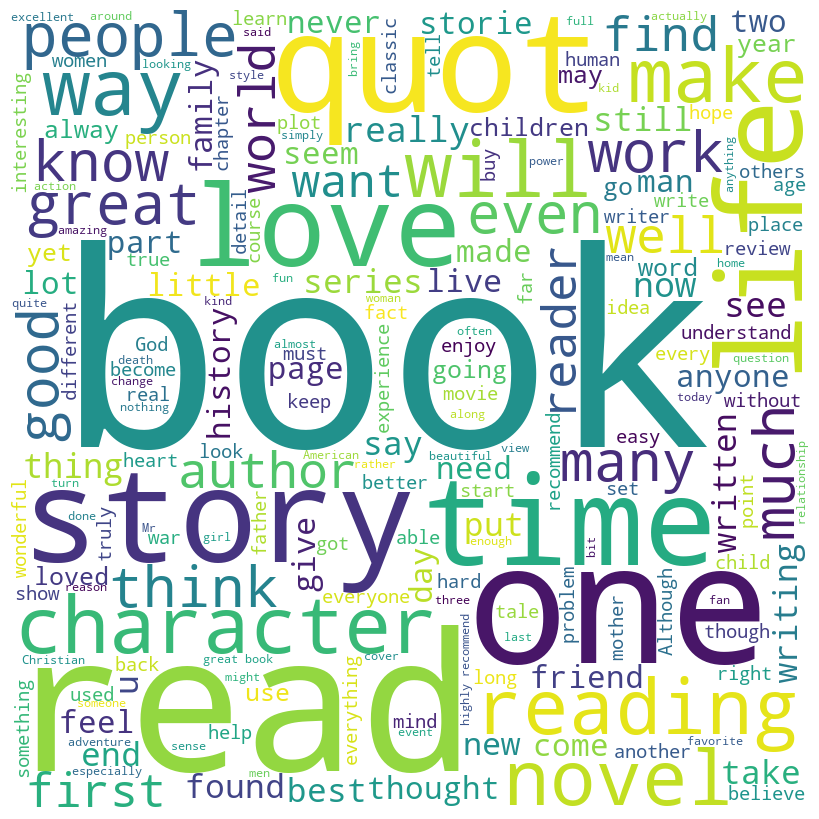

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(width=800, height=800, min_font_size=10, background_color='white')

positive_reviews_text = data[data['review/score'] > 4]['review/text'].str.cat(sep=" ")

positive_reviews_wc = wc.generate(positive_reviews_text)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(positive_reviews_wc, interpolation="bilinear")
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


**Readers give both positive and negative ratings across different genres, reflecting diverse preferences and tastes.**

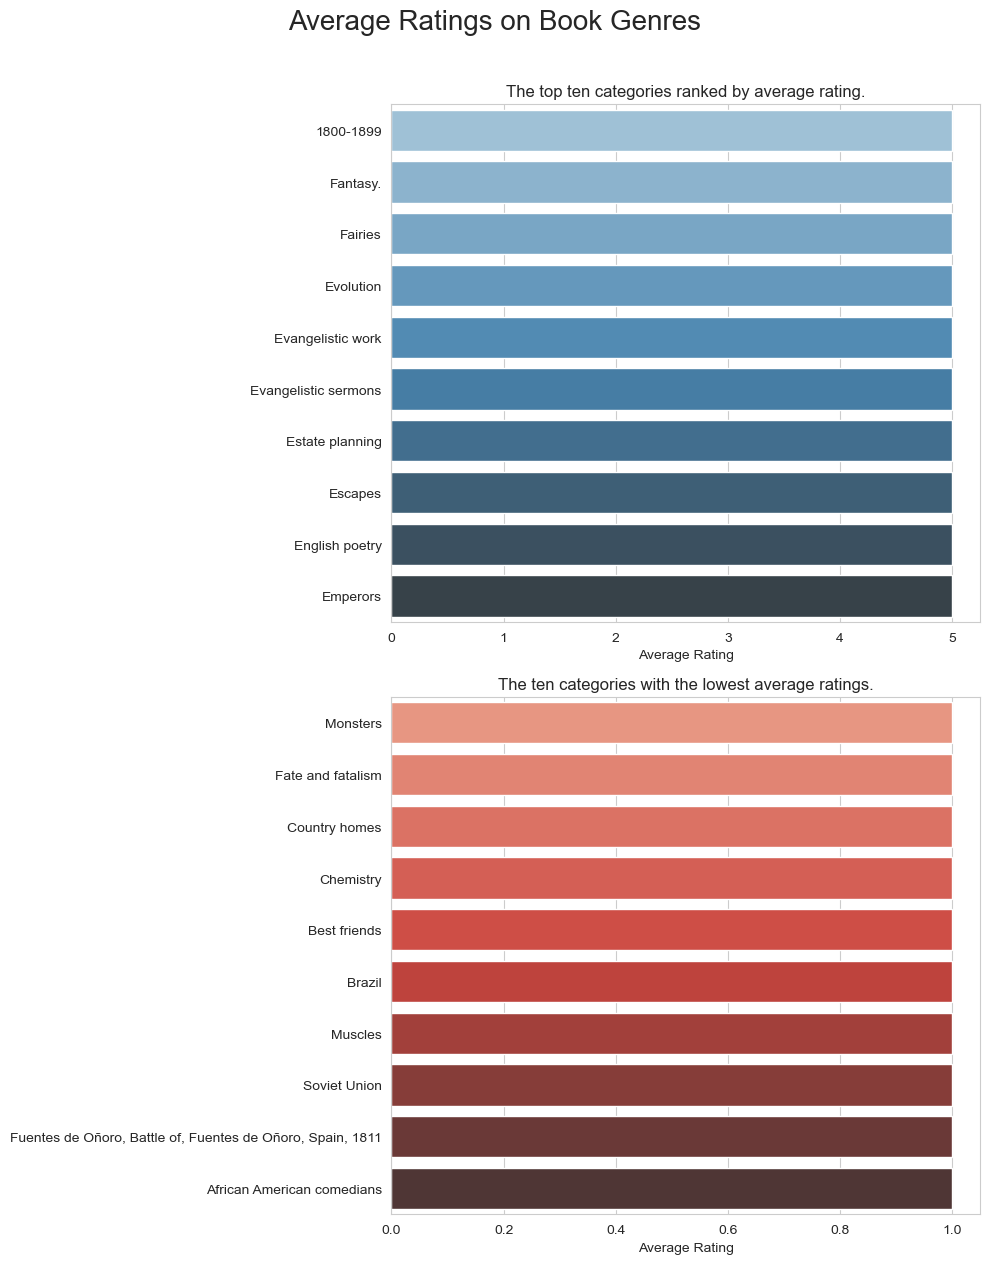

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("whitegrid")

fig, axes = plt.subplots(2, 1, figsize=(10, 12))

numeric_data = data.dropna(subset=['review/score'])

avg_cat_rating = numeric_data.groupby('categories')['review/score'].mean().sort_values(ascending=False).head(10)
avg_cat_rating_d = numeric_data.groupby('categories')['review/score'].mean().sort_values().head(10)

sns.barplot(x=avg_cat_rating, y=avg_cat_rating.index, palette="Blues_d", ax=axes[0])
axes[0].set_title('The top ten categories ranked by average rating.')
axes[0].set_xlabel('Average Rating')
axes[0].set_ylabel('')

sns.barplot(x=avg_cat_rating_d, y=avg_cat_rating_d.index, palette="Reds_d", ax=axes[1])
axes[1].set_title('The ten categories with the lowest average ratings.')
axes[1].set_xlabel('Average Rating')
axes[1].set_ylabel('')

plt.tight_layout()

plt.suptitle('Average Ratings on Book Genres', fontsize=20, y=1.05)

plt.show()


**Sentiment Analysis**

In [19]:
analyzer = SentimentIntensityAnalyzer()

In [20]:
data['clean_reviews'] = data['review/text'].str.lower()
data['score'] = data['clean_reviews'].apply(lambda review: analyzer.polarity_scores(review))

In [21]:
data['compound'] = data['review/text'].apply(lambda review: analyzer.polarity_scores(review.lower())['compound'])


In [22]:
data['Sentiment'] = data['compound'].apply(lambda x: 'positive' if x >= 0.05 else 'negative' if x < -0.05 else 'neutral')


If the compound value exceeds 0.05, it's considered positive. If the compound value is below -0.05, it's considered negative. If the compound value equals 0.0, it's considered neutral.

In [23]:
data.head()

,Title,review/score,review/text,authors,categories,ratingsCount,word_count,clean_reviews,score,compound,Sentiment
1808765,Heart of Darkness,5.0,What are the crucial events that began the 20t...,Joseph Conrad,Fiction,18.0,349,what are the crucial events that began the 20t...,"{'neg': 0.117, 'neu': 0.825, 'pos': 0.058, 'co...",-0.9696,negative
1768179,Racso and the Rats of NIMH,5.0,i started reading and i could not put it down ...,Jane Leslie Conly,Juvenile Fiction,5.0,23,i started reading and i could not put it down ...,"{'neg': 0.0, 'neu': 0.694, 'pos': 0.306, 'comp...",0.8316,positive
2026286,The unicorn,5.0,This is an older book by a great author that w...,Amy Krouse Rosenthal,Juvenile Fiction,7.0,40,this is an older book by a great author that w...,"{'neg': 0.0, 'neu': 0.76, 'pos': 0.24, 'compou...",0.9136,positive
1223363,Making Aromatherapy Creams and Lotions: 101 Na...,2.0,I got this book and 'Earthly Bodies & Heavenly...,Donna Maria,Health & Fitness,1.0,89,i got this book and 'earthly bodies & heavenly...,"{'neg': 0.065, 'neu': 0.762, 'pos': 0.173, 'co...",0.9136,positive
448099,"Crossroads of Twilight (The Wheel of Time, Boo...",1.0,The title says it all. I'm a huge fan of Jorda...,Robert Jordan,Fiction,65.0,333,the title says it all. i'm a huge fan of jorda...,"{'neg': 0.133, 'neu': 0.757, 'pos': 0.111, 'co...",-0.9413,negative


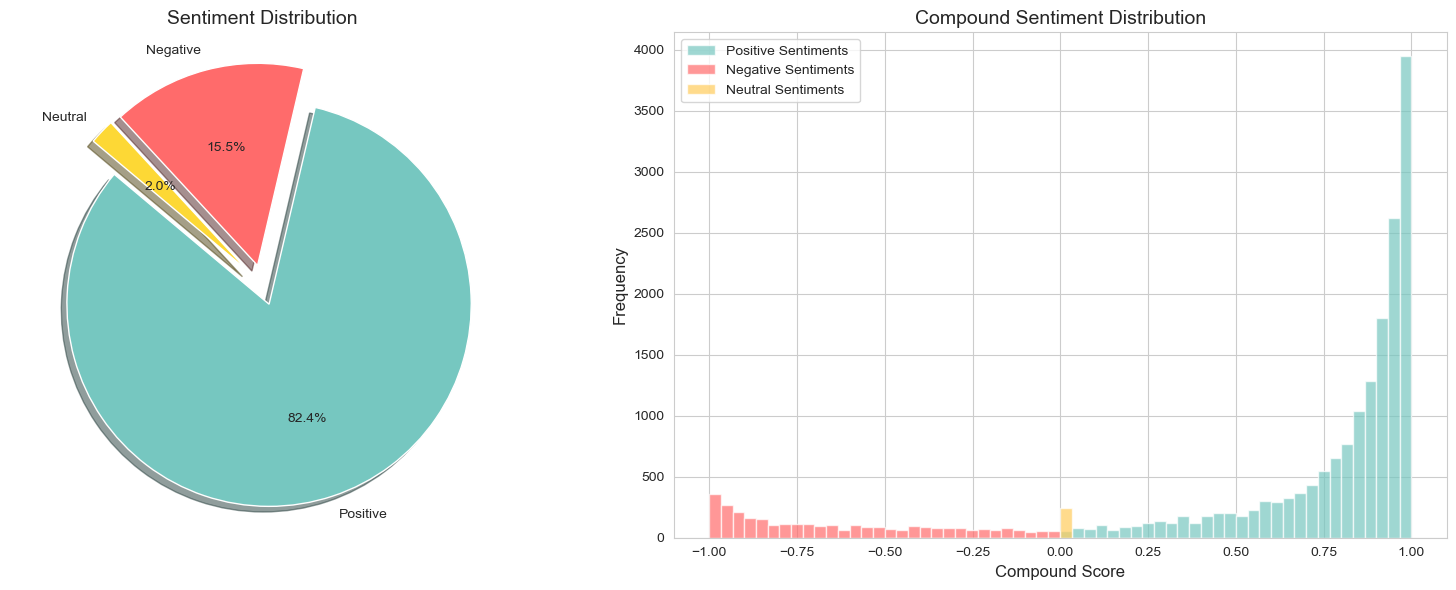

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_palette("pastel")

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

labels = ['Positive', 'Negative', 'Neutral']
sizes = data['Sentiment'].value_counts()
colors = ['#76c7c0', '#ff6b6b', '#fdd835']
explode = (0.1, 0.1, 0.1)

ax[0].pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
ax[0].set_title('Sentiment Distribution', fontsize=14)

colors = ['#76c7c0', '#ff6b6b', '#ffcc5c']
bins = 30

ax[1].hist(data[data['compound'] > 0]['compound'], bins=bins, color=colors[0], alpha=0.7, label='Positive Sentiments')
ax[1].hist(data[data['compound'] < 0]['compound'], bins=bins, color=colors[1], alpha=0.7, label='Negative Sentiments')
ax[1].hist(data[data['compound'] == 0]['compound'], bins=bins, color=colors[2], alpha=0.7, label='Neutral Sentiments')

ax[1].set_title('Compound Sentiment Distribution', fontsize=14)
ax[1].set_xlabel('Compound Score', fontsize=12)
ax[1].set_ylabel('Frequency', fontsize=12)
ax[1].legend()

plt.tight_layout()

plt.show()


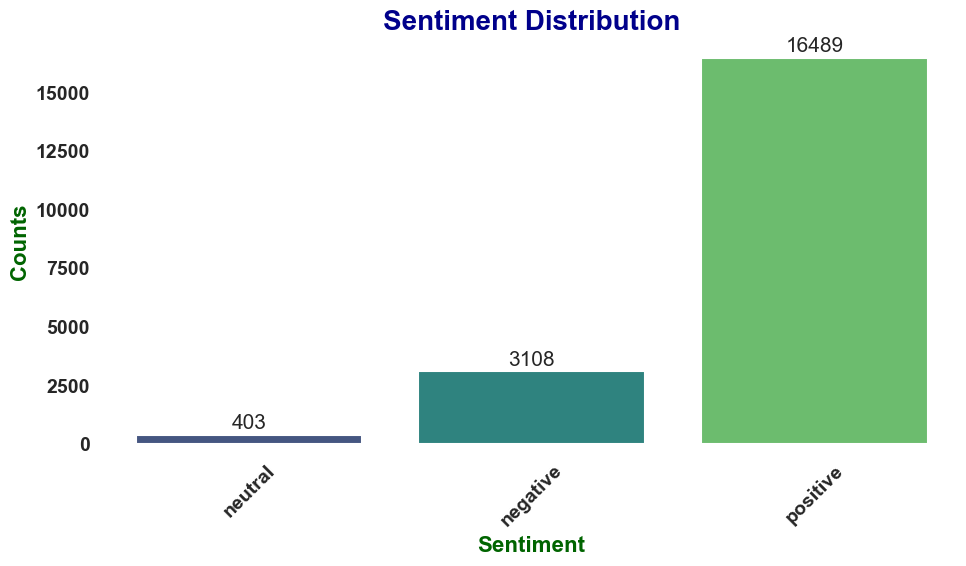

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", palette="pastel", context="talk")

sentiment_counts = data['Sentiment'].value_counts().sort_values()

fig, ax = plt.subplots(figsize=(10, 6))

bars = sns.barplot(x=sentiment_counts.index, y=sentiment_counts, ax=ax, palette="viridis")

ax.set_title('Sentiment Distribution', fontsize=20, fontweight='bold', color='darkblue')
ax.set_xlabel('Sentiment', fontsize=16, fontweight='bold', color='darkgreen')
ax.set_ylabel('Counts', fontsize=16, fontweight='bold', color='darkgreen')

for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

sns.despine(left=True, bottom=True)
plt.xticks(rotation=45, fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')
plt.grid(False)
plt.tight_layout()

# Show plot
plt.show()


**DataFrame comparing Reviews and Sentiments**

In [26]:
reviews_df = data[['clean_reviews', 'Sentiment']]


In [27]:
reviews_df.head(50)

,clean_reviews,Sentiment
1808765,what are the crucial events that began the 20t...,negative
1768179,i started reading and i could not put it down ...,positive
2026286,this is an older book by a great author that w...,positive
1223363,i got this book and 'earthly bodies & heavenly...,positive
448099,the title says it all. i'm a huge fan of jorda...,negative
550225,ms. siddons has created a true masterpiece of ...,negative
1327750,the book &quot;lonesome dove&quot; was a good ...,positive
2482226,this book reminded me of tom sawyer and huckle...,positive
1383181,"i loved this book, and think that schwager has...",positive
2010857,i thoroughly enjoyed every minute of this seri...,positive


In [28]:
x = reviews_df.drop(['Sentiment'], axis=1)
y = reviews_df['Sentiment']

**Text Normalization and Preprocessing**

In [29]:
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

In [30]:
stopword = {word.lower() for word in stopword}

url_pattern = re.compile(r'http\S+')
special_chars_pattern = re.compile(r'[^a-zA-Z0-9\s]')

lemmatizer = WordNetLemmatizer()

def clean(text):
    text = url_pattern.sub('', text)

    text = special_chars_pattern.sub('', text)

    words = text.split()
    lemmatized_and_filtered = [
        lemmatizer.lemmatize(word.lower()) for word in words
        if word.lower() not in stopword and word.isalpha()
    ]

    final_text = " ".join(lemmatized_and_filtered)

    return final_text


In [31]:
x["clean_reviews"] = x["clean_reviews"].apply(clean)

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=0)

In [33]:
x_train.head()

,clean_reviews
2515165,there bunch soda right apparently mean wordsi ...
953727,book came hand either completely chance divine...
1462121,read book english class least favorite book ev...
2469911,quantum biology spirituality merging braden ex...
2844976,easy read simple understand ofc need taken pin...


In [34]:
y_train.head()

2515165    negative
953727     positive
1462121    negative
2469911    positive
2844976    positive
Name: Sentiment, dtype: object

In [35]:
tfidf_vectorizer = TfidfVectorizer()

x_train_tfidf = tfidf_vectorizer.fit_transform(x_train['clean_reviews'])

x_test_tfidf = tfidf_vectorizer.transform(x_test['clean_reviews'])

x_train_tfidf_df = pd.DataFrame(x_train_tfidf.toarray())
x_test_tfidf_df =  pd.DataFrame(x_test_tfidf.toarray())

In [36]:
oversample = SMOTE()

In [37]:
x_train_bal, y_train_bal = oversample.fit_resample(x_train_tfidf, y_train)

In [38]:
x_test_bal, y_test_bal = oversample.fit_resample(x_test_tfidf, y_test)

### Logistic Regression on Imbalanced Data ###

              precision    recall  f1-score   support

    negative       0.84      0.30      0.44       787
     neutral       0.00      0.00      0.00       102
    positive       0.86      0.99      0.92      4111

    accuracy                           0.86      5000
   macro avg       0.57      0.43      0.46      5000
weighted avg       0.84      0.86      0.83      5000



C:\Users\Precision5570\anaconda3\envs\TextMining5\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Precision5570\anaconda3\envs\TextMining5\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Precision5570\anaconda3\envs\TextMining5\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

C:\Users\Precision5570\anaconda3\envs\TextMining5\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Logistic Regression on Balanced Data ###

              precision    recall  f1-score   support

    negative       0.63      0.71      0.67      4111
     neutral       0.89      0.14      0.24      4111
    positive       0.53      0.92      0.67      4111

    accuracy                           0.59     12333
   macro avg       0.68      0.59      0.53     12333
weighted avg       0.68      0.59      0.53     12333





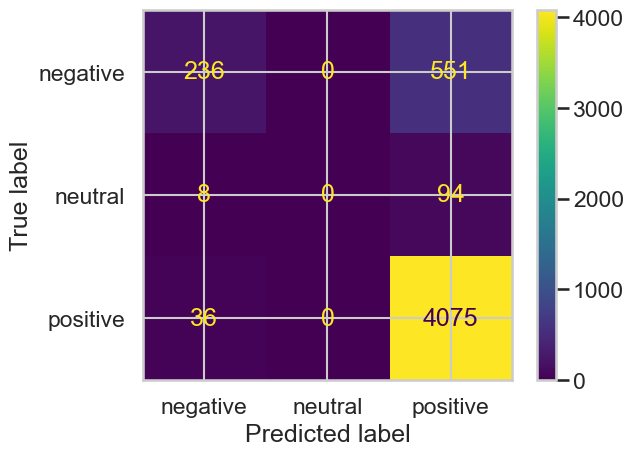

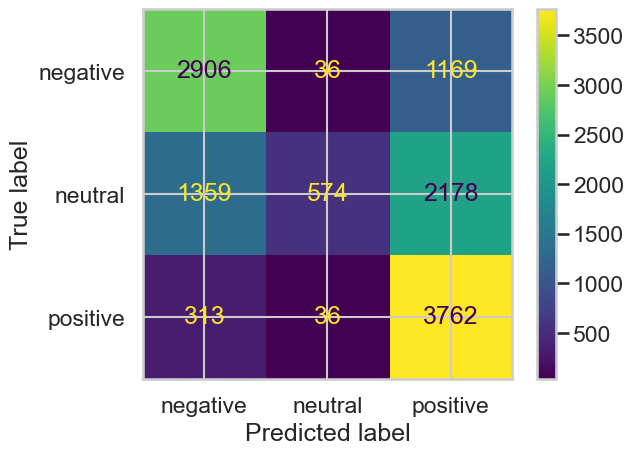

In [39]:
def train_and_evaluate(model, x_train, y_train, x_test, y_test, model_name='Model', data_type='Imbalanced'):
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)

    print(f"### {model_name} on {data_type} Data ###\n")
    print(classification_report(y_test, predictions))

    cm = confusion_matrix(y_test, predictions, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    print("\n")

# Logistic Regression
log_model = LogisticRegression()
train_and_evaluate(LogisticRegression(), x_train_tfidf_df, y_train, x_test_tfidf_df, y_test, 'Logistic Regression', 'Imbalanced')
train_and_evaluate(LogisticRegression(), x_train_bal, y_train_bal, x_test_bal, y_test_bal, 'Logistic Regression', 'Balanced')

# # Decision Tree
# tree_model = DecisionTreeClassifier(criterion='entropy', random_state=45)
# train_and_evaluate(tree_model, x_train_tfidf_df, y_train, x_test_tfidf_df, y_test, 'Decision Tree', 'Imbalanced')
# train_and_evaluate(tree_model, x_train_bal, y_train_bal, x_test_bal, y_test_bal, 'Decision Tree', 'Balanced')

# # Naive Bayes
# def train_and_evaluate_nb(x_train, y_train, x_test, y_test, data_type='Imbalanced'):
#     if hasattr(x_train, "toarray"): x_train = x_train.toarray()
#     if hasattr(x_test, "toarray"): x_test = x_test.toarray()

#     nb_model = GaussianNB()
#     train_and_evaluate(nb_model, x_train, y_train, x_test, y_test, 'Naive Bayes', data_type)

# train_and_evaluate_nb(x_train_tfidf_df, y_train, x_test_tfidf_df, y_test, 'Imbalanced')
# train_and_evaluate_nb(x_train_bal, y_train_bal, x_test_bal, y_test_bal, 'Balanced')

# # RandomForest
# rf_model = RandomForestClassifier(n_estimators=100)
# train_and_evaluate(rf_model, x_train_tfidf_df, y_train, x_test_tfidf_df, y_test, 'RandomForest', 'Imbalanced')
# train_and_evaluate(rf_model, x_train_bal, y_train_bal, x_test_bal, y_test_bal, 'RandomForest', 'Balanced')


In [ ]:
def predict(text,model):
  input_text = [text]
  text_to_vec = tfidf_vectorizer.transform(input_text).toarray()
  prediction = model.predict(text_to_vec)
  return prediction

In [ ]:
User_input = input("Enter your text:")
output = predict(User_inpu,log_model)
print(output)

Enter your text:I hate you


TypeError: predict() missing 1 required positional argument: 'model'

# **NERC:**

In [ ]:
import pandas as pd

# Load the NERC dataset
path = books_rating_path
ner_dataset = pd.read_csv(path, encoding='latin1', on_bad_lines='skip')

# Split the dataset into train and test sets
df_train = ner_dataset[:100000]
df_test = ner_dataset[100000:120000]

# Extract features and NERC labels from the training set
training_features = []
training_gold_labels = []
for _, row in df_train.iterrows():
    a_dict = {
        'words': row['review/text'],
        #'pos': row['POS']
    }
    training_features.append(a_dict)
    training_gold_labels.append(row['Tag'])

# Extract features and NERC labels from the test set
test_features = []
test_gold_labels = []
for _, row in df_test.iterrows():
    a_dict = {
        'words': row['review/text'],
        #'pos': row['POS']
    }
    test_features.append(a_dict)
    test_gold_labels.append(row['Tag'])

from sklearn.feature_extraction import DictVectorizer

# Combine train and test features in a list
all_features = training_features + test_features

# Represent features using one-hot encoding with DictVectorizer
vec = DictVectorizer()
X = vec.fit_transform(all_features)

# Split features back to training and test
X_train = X[:len(training_features)]
X_test = X[len(training_features):]

from sklearn import svm
from sklearn.metrics import classification_report

# Train SVM using the training features and NERC labels
lin_clf = svm.LinearSVC()
lin_clf.fit(X_train, training_gold_labels)

# Predict labels for test data
predicted_labels = lin_clf.predict(X_test)

# Evaluate
classification_rep = classification_report(test_gold_labels, predicted_labels, zero_division=1)
print("Classification Report:")
print(classification_rep)